# Homework 2 | Hunter Romano | Housing Price Predictor

In [417]:
# The goal of this assignment is to predict the sales price for each house 
# root mean squared error is the evaluation metric. 

# Part 1 | Import Packages & the Data Set

In [418]:
# package for listing and algebra
import numpy as np

# package for data processing
import pandas as pd

# package for plots
import matplotlib.pyplot as plt
%matplotlib inline

# package for regression analysis
import statsmodels.api as sm
from math import sqrt
import os

# package for statistics

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

# package for more plotting
import seaborn as sns

# import a specific color palette and style guide
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score

from IPython.display import display, FileLink

# Cool command to get rid of useless warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn



In [419]:
# import the data set | 
house = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

# look at data to make sure it was imported and correct
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [420]:
# I want a full list of the attributes in the set
# I can understand what data points I have and how to move forward
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [421]:
# I want a better understanding of the values 
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [422]:
# More views
house.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# Part 2 | Clean & Explore the Data

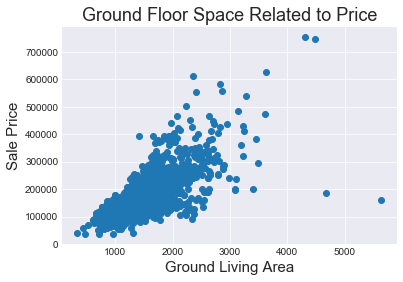

In [423]:
# First I want to explore outliers, 
#as it was the first cleaning we covered in class
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
# ^ This kernel helped me learn a lot about cleaning data 
# the dataset page says that a plot of sale price and gr liv area will quickly help
# someoen determine 5 data points that should be removed, so let's do that
fig, outlier_discovery = plt.subplots()
outlier_discovery.scatter(x=house['GrLivArea'], y=house['SalePrice'])
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Ground Living Area' , fontsize=15)
plt.title ('Ground Floor Space Related to Price', fontsize = 18)
plt.show()

In [424]:
# The points to the far bottom right are obvious outliers
# I will delte them in order to not skew the data
#house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<300000)].index)

# the data page says 5 observations though so I assume I shoudl remove those at the far upper right as well
house = house.drop(house[(house['GrLivArea']>4000)].index)


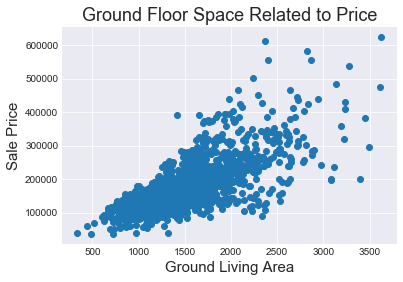

In [425]:
# Check to make sure that they are gone
fig, outlier_discovery = plt.subplots()
outlier_discovery.scatter(x=house['GrLivArea'], y=house['SalePrice'])
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Ground Living Area' , fontsize=15)
plt.title ('Ground Floor Space Related to Price', fontsize = 18)
plt.show()

In [426]:
# Intuitevily one would think that total square feet is a major precitor of price
# Referring to prior lists this attribute doesn't exist, so I will create it
house['total_sf'] = (house['BsmtFinSF1'].fillna(0) + house['BsmtFinSF2'].fillna(0) + house['1stFlrSF'].fillna(0) + house['2ndFlrSF'].fillna(0))

In [427]:
# I want to make sure that worked, so let's take a look
house.total_sf.head()


0    2416
1    2240
2    2272
3    1933
4    2853
Name: total_sf, dtype: int64

In [428]:
# This competition requires Sale Price predictions
# As the target variable I will remove from the data frame and take the log
# I like the pop removal but was having trouble with my columns so I will keep it there just after a hashtag more as a note for myself
sale_price = house.pop('SalePrice')
sale_price_log = np.log(sale_price)
#house.drop(['SalePrice'], axis=1, inplace=True)

In [429]:
# This variable is numerical but doesn't mean anything, i will keep pop command though even behind hashtag just for reference
#house_id = house.pop = ('Id')
house.drop(['Id'], axis=1, inplace=True)

In [430]:
# As I cntinue to clean I need to divide attribute columns between 
# those that are continuous and those that are categorical
# continuous contains numerical data points 
# categorical contains text data points
# I will divide and label them based on the type of data in them
house.dtypes


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [431]:
# These attributes contain numerical data
continuous_data = [
    'BsmtUnfSF',
    'FullBath',
    'LotFrontage',
    'BsmtFullBath',
    '3SsnPorch',
    'BedroomAbvGr',
    'LowQualFinSF',
    'BsmtFinSF1',
    'WoodDeckSF',
    'GarageArea',
    'MiscVal',
    'BsmtHalfBath',
    'HalfBath',
    'EnclosedPorch',
    'ScreenPorch',
    'TotRmsAbvGrd',
    'Fireplaces',
    'KitchenAbvGr',
    'GarageCars',
    '1stFlrSF',
    'BsmtFinSF2',
    'PoolArea',
    '2ndFlrSF',
    'TotalBsmtSF',
    'total_sf',
    'GrLivArea',
    'LotArea',
    'OpenPorchSF',
    'MasVnrArea'
]


In [432]:
# By default the other attributes are categorical
categorical_data = [col for col in house.columns if col not in continuous_data]

# check to make sure I did that correctly
categorical_data


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [433]:
# Check this to make sure all is well

assert len(house.columns) == len(categorical_data + continuous_data)

In [434]:
# Now I need to convert categorical columns into a pandas datatype
for col_name, col in house[categorical_data].items():
    house[col_name] = col.astype('category').cat.as_ordered()

In [435]:
# I need to now ensure that order type attributes are ordered correctly.
ordinal_data =[
    ('ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtExposure', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtFinType1', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
    ('BsmtFinType2', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
    ('HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('FireplaceQu', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('GarageFinish', ['Unf', 'Rfn', 'Fin']),
    ('GarageQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('GarageCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('PoolQC', ['Fa', 'TA', 'Gd', 'Ex']),
    ('OverallQual', list(range(1, 11))),
    ('OverallCond', list(range(1, 11))),
    ('LandSlope', ['Sev', 'Mod', 'Gtl']),
    ('Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']),
    ('YearBuilt', list(range(1800, 2018))),
    ('YrSold', list(range(2006, 2018))),
    ('GarageYrBlt', list(range(1900, 2018))),
    ('YearRemodAdd', list(range(1900, 2018)))
]

ordinal_columns = [o[0] for o in ordinal_data]

for col, categories in ordinal_data:
    house[col].cat.set_categories(categories, ordered = True, inplace=True)
   

In [436]:
#Conner and I discussed pd.factorize which I tried as well, but found a more intuitive version of this method online

# Now to deal with columns with no ordinal relationship
other_columns = [col for col in categorical_data if col not in ordinal_columns]

assert len(categorical_data) == len(ordinal_columns + other_columns)

# Replacing Missing Data

In [437]:
# Now that we have identified holes in the data we need to fill them
# I will be replacing these holes with median values
NAs = {}

for col in (
 'GarageArea', 'GarageCars', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
    'MasVnrArea'):
    
    NAs[col] = 0
    house[col] = house[col].fillna(0)
    house[f'{col}_na'] = pd.isna(house[col])

In [438]:
# Now to work on the continuous type variables
for col in continuous_data:
    if not len(house[house[col].isna()]):
        continue
        
    median = house[col].median()
    
    house[f'{col}_na'] = pd.isna(house[col])
    house[col] = house[col].fillna(median)
    
    NAs[col] = median    

In [439]:
# Now to unskew the data
# Let us use Scikit Learn to visualize the data disctribution

skew_feats = house[continuous_data].apply(skew).sort_values(ascending=False)
skew_feats.head(20)

# looks good to me

MiscVal          24.418175
PoolArea         17.504556
LotArea          12.574590
3SsnPorch        10.279262
LowQualFinSF      8.989291
KitchenAbvGr      4.476748
BsmtFinSF2        4.244209
BsmtHalfBath      4.124712
ScreenPorch       4.111400
EnclosedPorch     3.081275
MasVnrArea        2.654761
OpenPorchSF       2.337435
LotFrontage       1.709693
WoodDeckSF        1.549672
BsmtUnfSF         0.920809
1stFlrSF          0.866187
GrLivArea         0.834332
total_sf          0.826638
2ndFlrSF          0.777065
BsmtFinSF1        0.744088
dtype: float64

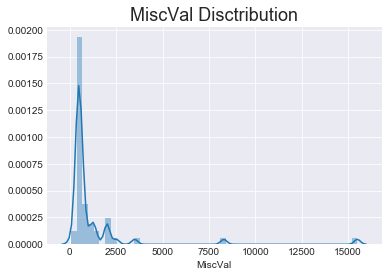

In [440]:
# The most skewed attribute is MiscVal
sns.distplot(house[house['MiscVal'] !=0]['MiscVal'])
plt.title ('MiscVal Disctribution', fontsize = 18)
plt.show()

In [441]:
# By logging the most skewed attributes, the overall data quality should improve
skew_feats = skew_feats[abs(skew_feats) > .75]

for feat in skew_feats.index:
    house[feat] = np.log1p(house[feat])
    

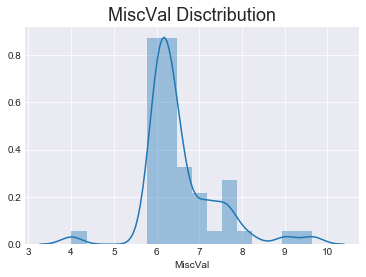

In [442]:
# Look back to see how that disctribution has changed
sns.distplot(house[house['MiscVal'] !=0]['MiscVal'])
plt.title ('MiscVal Disctribution', fontsize = 18)
plt.show()

# Add numbers and dummies

In [443]:
# In order to predict price we need to create dummies to replace text attribute values
house_numbered = house.copy()
dummies = pd.get_dummies(house_numbered[other_columns], dummy_na=True)
for col_name in categorical_data:
    # Add 1 to replace values of -1 with 0
    house_numbered[col_name] = house_numbered[col_name].cat.codes +1
    

In [444]:
# Finalize the dummie assignments
# Drop the useless values
house_numbered.drop(other_columns, axis=1, inplace=True)
house_numbered = pd.concat([house_numbered, dummies], axis=1)

# Train Models

In [445]:
# My colleague at work, works with machine learning
# After several models that yielded poor results he recomended KFolds cross-validatin, and Lasso
# The Lasso model should help with the overfitting of a straight linear regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model = Lasso(alpha=0.0004)

scores = np.sqrt(-cross_val_score(model, house_numbered, sale_price_log, cv=kf, scoring='neg_mean_squared_error'))


In [446]:
# Mean looks great so now let's train
scores.mean()

0.10893635891353817

In [447]:
train_model = Lasso(alpha=0.0004)
train_model.fit(house_numbered, sale_price_log)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [449]:
# Model is all set so let's run this with our testing data
house_test = pd.read_csv("/Users/hunterromano/Desktop/test.csv")

In [451]:
# Put this data set through the exact same steps we put our training data through
house_test.drop(['Id'], axis=1, inplace=True)
#house_id = house_test.pop('Id')



In [452]:
house_test['total_sf'] = (
    house_test['BsmtFinSF1'].fillna(0) + house_test['BsmtFinSF2'].fillna(0) +
    house_test['1stFlrSF'].fillna(0) + house_test['2ndFlrSF'].fillna(0))

In [453]:
house_numbered.describe()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.0,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.0
mean,4.212045,9.107632,2.937500,6.088599,5.576236,172.18544,85.819368,2.112089,3.392170,3.083791,...,0.002060,0.868819,0.0,0.068681,0.002747,0.008242,0.013736,0.822115,0.084478,0.0
std,0.310711,0.513351,0.276593,1.369669,1.113966,30.20159,20.652143,2.623183,0.570206,0.351509,...,0.045361,0.337715,0.0,0.252998,0.052360,0.090440,0.116434,0.382547,0.278199,0.0
min,3.091042,7.170888,1.000000,1.000000,1.000000,73.00000,51.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.110874,8.927944,3.000000,5.000000,5.000000,155.00000,67.750000,0.000000,3.000000,3.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,4.248495,9.155831,3.000000,6.000000,5.000000,173.00000,94.500000,0.000000,3.000000,3.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,4.382027,9.357811,3.000000,7.000000,6.000000,201.00000,105.000000,5.101386,4.000000,3.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,5.749393,12.279537,3.000000,10.000000,9.000000,211.00000,111.000000,7.378384,5.000000,5.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [454]:
len(categorical_data)

51

In [455]:
house.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,total_sf
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,4.212045,9.107632,2.112089,436.991071,0.657199,5.646361,1050.658654,7.005663,2.852287,0.100088,...,1.764423,471.568681,2.448979,2.301153,0.699936,0.085914,0.411800,0.021932,0.234097,7.531095
std,0.310711,0.513351,2.623183,430.255052,1.847259,1.855994,412.155715,0.313046,3.289411,0.748362,...,0.746215,211.986421,2.595194,2.150232,1.729301,0.667777,1.404956,0.373830,1.227653,0.357484
min,3.091042,7.170888,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131
25%,4.110874,8.927944,0.000000,0.000000,0.000000,5.409404,795.000000,6.783325,0.000000,0.000000,...,1.000000,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.307035
50%,4.248495,9.155831,0.000000,381.000000,0.000000,6.170651,990.500000,6.991177,0.000000,0.000000,...,2.000000,478.500000,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,7.529675
75%,4.382027,9.357811,5.101386,706.500000,0.000000,6.695799,1293.750000,7.237239,6.591674,0.000000,...,2.000000,576.000000,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,7.773594
max,5.749393,12.279537,7.378384,2188.000000,7.296413,7.756623,3206.000000,8.079928,7.506042,6.350886,...,4.000000,1390.000000,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,8.520189


In [456]:
house_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,total_sf
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,1973.988348
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,747.645421
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,407.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1478.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1829.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2376.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,9105.000000


In [457]:
#for col_name in categorical_data:
   # house_test[col_name] = (
      #  pd.Categorical(
         #   house_test[col_name], 
         #   categories=house[col_name].cat.categories, 
          #  ordered=True))

In [458]:
for col in continuous_data:
    if col not in NAs: continue
        
    house_test[f'{col}_na'] = pd.isna(house_test[col])
    house_test[col] = house_test[col].fillna(NAs[col])

In [459]:
# Control for remaining NAs
house_test[continuous_data] = house_test[continuous_data].fillna(house_test[continuous_data].median())


In [460]:
for feat in skew_feats.index:
    house_test[feat] = np.log1p(house_test[feat])

In [461]:
house_final_test = house_test.copy()

In [462]:
test_dummies = pd.get_dummies(house_final_test[other_columns], dummy_na=True)
for col_name in categorical_data:
    house_final_test[col_name] = house_final_test[col_name].cat.codes + 1
house_final_test.drop(other_columns, axis=1, inplace=True)
house_final_test = pd.concat([house_final_test, test_dummies], axis=1)


AttributeError: Can only use .cat accessor with a 'category' dtype

In [391]:
#predictions = train_model.predict(house_final_test)

In [392]:
# Create CSV and take the reverse log
#pd.DataFrame({'Id': house_id, 'SalePrice': np.exp(predictions)}).to_csv('output.csv')


In [416]:
categorical_data

['Id',
 'MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']